# Ahmad M. Osman - Dr. Lee, DS320


## Assignment Instructions
Use Matplotlib to explore the movie data that you created from the midterm. 

If you did not succeed in building your movies.csv file you can use mine from 

http://knuth.luther.edu/~leekent/movies.csv

Build a jupyter notebook which reads the csv and then find at least 4 correlations within the data based on 2, 3, or 4 columns of data. More credit will be given to interesting correlations and you may provide more than four in your homework. 

Include comments in your jupyter notebook that provide the narrative for what you found. Be prepared to present on this after it is due. 

# Interesting Things I Found After Finishing the Assignment
* Metascore is the rating of critics while IMDB rating is for users on the website. 
* There is a correlation of 0.42, which is moderate, between Metascore and IMDB rating.
* The older the movie, the higher the rating, can be seen as there is a negative correlation between Metascore/imdbRating and Year. This is stronger for critics than IMDB users. Although, this is not a very strong conclusion in general, still can be seen.
* There is a correlation of 0.62, which is moderate/strong, between number of IMDB votes and Adjusted Gross.

### Recipes - Please Click on Correlations to Skip my Data Exploration
* [Looking At The Data First](#Looking-At-The-Data-First)
* [Correlations](#Correlations)

In [114]:
# we need these libraries
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt

# Looking At The Data First

In [115]:
# reading the gather info from knuth
movies = pd.read_csv('http://knuth.luther.edu/~osmaah02/osmanTop500MoviesInflationAdjusted.csv')

In [116]:
# looking at the first five rows
movies.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Month,AdjustedForInflationBoxOffice
0,The Godfather,1972,R,24-Mar-72,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,100.0,9.2,1370696.0,tt0068646,movie,9-Oct-01,NaN,Paramount Pictures,http://www.thegodfather.com,True,Mar,0.0
1,Raiders of the Lost Ark,1981,PG,12-Jun-81,115 min,"Action, Adventure",Steven Spielberg,"Lawrence Kasdan (screenplay by), George Lucas ...","Harrison Ford, Karen Allen, Paul Freeman, Rona...","In 1936, archaeologist and adventurer Indiana ...","English, German, Hebrew, Spanish, Arabic, Nepali",USA,Won 4 Oscars. Another 30 wins & 23 nominations.,https://m.media-amazon.com/images/M/MV5BMjA0OD...,85.0,8.5,776796.0,tt0082971,movie,21-Oct-03,NaN,Paramount Pictures,http://www.indianajones.com/raiders/,True,Jun,0.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,PG,20-Jun-80,124 min,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the rebels are brutally overpowered by t...,English,USA,Won 1 Oscar. Another 21 wins & 19 nominations.,https://m.media-amazon.com/images/M/MV5BYmU1ND...,82.0,8.8,1007473.0,tt0080684,movie,21-Sep-04,4548170.0,Twentieth Century Fox,http://www.starwars.com/episode-v/,True,Jun,13871918.5
3,The Shawshank Redemption,1994,R,14-Oct-94,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 32 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,80.0,9.3,2005476.0,tt0111161,movie,27-Jan-98,NaN,Columbia Pictures,NaN,True,Oct,0.0
4,Jaws,1975,PG,20-Jun-75,124 min,"Adventure, Drama, Thriller",Steven Spielberg,"Peter Benchley (screenplay), Carl Gottlieb (sc...","Roy Scheider, Robert Shaw, Richard Dreyfuss, L...","A local sheriff, a marine biologist and an old...",English,USA,Won 3 Oscars. Another 11 wins & 18 nominations.,https://m.media-amazon.com/images/M/MV5BMmVmOD...,87.0,8.0,489473.0,tt0073195,movie,11-Jul-00,NaN,Universal Pictures,http://www.jaws25.com/,True,Jun,0.0


In [117]:
# so we have 500 rows of 26 columns
movies.shape

(500, 26)

In [118]:
# lets look at data description, numerical value variables only
with pd.option_context('display.max_rows', 8):
    display(movies.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
Year,500.0,1.980032e+03,2.077957e+01,1924.0,1966.0,1984.0,1998.0,2008.0
Metascore,379.0,7.920844e+01,1.240184e+01,41.0,70.0,80.0,89.0,100.0
imdbRating,500.0,7.871800e+00,4.879148e-01,5.7,7.6,7.9,8.2,9.3
imdbVotes,499.0,2.706051e+05,3.250212e+05,1839.0,39425.5,152514.0,372048.0,2005476.0
BoxOffice,103.0,9.913201e+07,1.267996e+08,17599.0,5166076.0,44566004.0,155194037.0,533316061.0
AdjustedForInflationBoxOffice,500.0,2.744930e+07,9.370915e+07,0.0,0.0,0.0,0.0,655120000.0


In [119]:
# now lets do the same for categorical variables
movies.describe(include=[np.object, pd.Categorical]).T
# looks like we have two beauty and the beast movies
# also, 2004 seems to be a full of creativity year!

,count,unique,top,freq
Title,500,498,King Kong,2
Rated,492,12,R,210
Released,499,483,20-Jun-80,2
Runtime,500,125,110 min,19
Genre,500,179,Drama,37
Director,499,299,Steven Spielberg,11
Writer,497,472,Woody Allen,4
Actors,499,498,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",2
Plot,500,500,Ambitious but troubled movie director Edward D...,1
Language,499,154,English,210


In [120]:
(movies["Title"] == "Beauty and the Beast").value_counts()

False    498
True       2
Name: Title, dtype: int64

In [121]:
# lets get some info about this DataFrame - 
# This tells us how many non-null objects for each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
Title                            500 non-null object
Year                             500 non-null int64
Rated                            492 non-null object
Released                         499 non-null object
Runtime                          500 non-null object
Genre                            500 non-null object
Director                         499 non-null object
Writer                           497 non-null object
Actors                           499 non-null object
Plot                             500 non-null object
Language                         499 non-null object
Country                          500 non-null object
Awards                           483 non-null object
Poster                           500 non-null object
Metascore                        379 non-null float64
imdbRating                       500 non-null float64
imdbVotes                        499 non-null 

In [122]:
# lets count the nulls?
movies.isnull().sum()


Title                              0
Year                               0
Rated                              8
Released                           1
Runtime                            0
Genre                              0
Director                           1
Writer                             3
Actors                             1
Plot                               0
Language                           1
Country                            0
Awards                            17
Poster                             0
Metascore                        121
imdbRating                         0
imdbVotes                          1
imdbID                             0
Type                               0
DVD                               10
BoxOffice                        397
Production                         9
Website                          310
Response                           1
Month                              1
AdjustedForInflationBoxOffice      0
dtype: int64

In [123]:
# looks like we have a lot of them - lets drop the ones that 
# do not have box office values
movies = movies.dropna(subset=["BoxOffice"])

In [124]:
# and we are left with?
movies.count()

Title                            103
Year                             103
Rated                            103
Released                         103
Runtime                          103
Genre                            103
Director                         103
Writer                           103
Actors                           103
Plot                             103
Language                         103
Country                          103
Awards                           103
Poster                           103
Metascore                         99
imdbRating                       103
imdbVotes                        103
imdbID                           103
Type                             103
DVD                              103
BoxOffice                        103
Production                       103
Website                           96
Response                         103
Month                            103
AdjustedForInflationBoxOffice    103
dtype: int64

In [125]:
# what columns do we have?
movies.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD',
       'BoxOffice', 'Production', 'Website', 'Response', 'Month',
       'AdjustedForInflationBoxOffice'],
      dtype='object')

In [126]:
# one more statistical description on numerical columns
movies.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year,103.0,1.998417e+03,1.586000e+01,1925.0,2000.50,2004.0,2006.0,2008.0
Metascore,99.0,7.753535e+01,1.197303e+01,46.0,68.00,80.0,85.5,100.0
imdbRating,103.0,7.828155e+00,5.645435e-01,6.1,7.50,7.9,8.2,9.0
imdbVotes,103.0,4.686225e+05,3.679558e+05,6831.0,216119.50,391323.0,632194.5,1969949.0
BoxOffice,103.0,9.913201e+07,1.267996e+08,17599.0,5166076.00,44566004.0,155194037.0,533316061.0
AdjustedForInflationBoxOffice,103.0,1.332490e+08,1.694818e+08,52414.6,8749140.73,62860656.6,190408024.0,655120000.0


In [127]:
# one more statistical description on categorical columns
movies.describe(include=[np.object, pd.Categorical]).T
# I am so happy seeing Christopher Nolan as the highest frequent director!

,count,unique,top,freq
Title,103,103,Superbad,1
Rated,103,6,R,47
Released,103,99,3-Jun-05,2
Runtime,103,64,102 min,5
Genre,103,65,Drama,6
Director,103,86,Peter Jackson,4
Writer,103,102,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2
Actors,103,103,"George Clooney, Cecelia Ann Birt, Paul L. Nola...",1
Plot,103,103,A filmmaker recalls his childhood when falling...,1
Language,103,47,English,34


In [128]:
# lets look at some percentiles, shall we?
with pd.option_context('display.max_rows', 5):
    display(movies.describe(include=[np.number], 
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Year,103.0,1.998417e+03,1.586000e+01,1925.0,1931.1400,1966.20,1985.40,2000.50,2004.0,2006.0,2.007000e+03,2.007000e+03,2.008000e+03,2008.0
Metascore,99.0,7.753535e+01,1.197303e+01,46.0,50.9000,54.80,62.00,68.00,80.0,85.5,9.220000e+01,9.500000e+01,9.804000e+01,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BoxOffice,103.0,9.913201e+07,1.267996e+08,17599.0,26978.4800,146021.00,641454.60,5166076.00,44566004.0,155194037.0,3.180300e+08,3.724401e+08,4.308407e+08,533316061.0
AdjustedForInflationBoxOffice,103.0,1.332490e+08,1.694818e+08,52414.6,295950.6196,539814.12,1779524.04,8749140.73,62860656.6,190408024.0,4.118577e+08,5.190607e+08,6.123510e+08,655120000.0


# Correlations

### Lets clean the data first

In [129]:
# I am going to focus on numerical variables - this data cleaning will make sure
# that all variables are of the correct type and that there are no empty values

movies.imdbVotes.replace(regex=True,inplace=True,to_replace=',',value='')
movies.imdbVotes = movies.imdbVotes.astype("float64")

movies.AdjustedForInflationBoxOffice = movies.AdjustedForInflationBoxOffice.replace(0,np.nan)
movies.AdjustedForInflationBoxOffice = movies.AdjustedForInflationBoxOffice.astype("float64")

movies.imdbRating = movies.imdbRating.replace(0,np.nan)
movies.imdbRating = movies.imdbRating.astype("float64")

movies.BoxOffice = movies.BoxOffice.replace(0,np.nan)
movies.BoxOffice = movies.BoxOffice.astype("float64")

movies.Metascore = movies.Metascore.replace(0,np.nan)
movies.Metascore = movies.Metascore.astype("float64")

movies.Year = movies.Year.replace(0,np.nan)
movies.Year = movies.Year.astype("float64")

### Lets look at the correlation between the year a movie is in theaters and the Box Office values

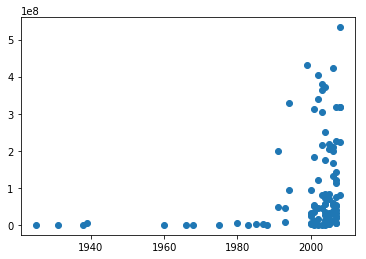

In [130]:
plt.scatter(x="Year", y="BoxOffice", data=movies)

In [131]:
# no strong correlation between year and BoxOffice
movies["Year"].astype("int64").corr(movies["BoxOffice"])

0.25975908496796873

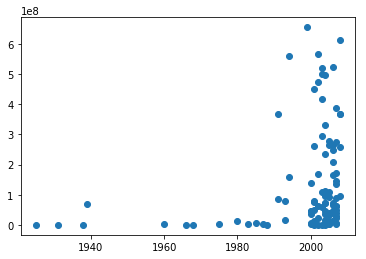

In [132]:
# maybe the same plot but with an Adjusted Gross
plt.scatter(x="Year", y="AdjustedForInflationBoxOffice", data=movies)

In [133]:
# still no huge difference.
movies["Year"].astype("int64").corr(movies["AdjustedForInflationBoxOffice"])

0.221725510261061

### What about IMDB Rating and Adjusted Gross

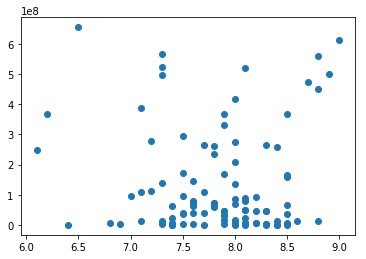

In [134]:
plt.scatter(x="imdbRating", y="AdjustedForInflationBoxOffice", data=movies)

In [135]:
movies["imdbRating"].astype("int64").corr(movies["AdjustedForInflationBoxOffice"])
# The calculated value does not show that there is a huge correlation, especially that a highly rated movie does
# not necesserily have to have a high adjusted box office values

0.011905000725520233

### What about the Metascore? Do critics ratings allign more with the adjusted box office

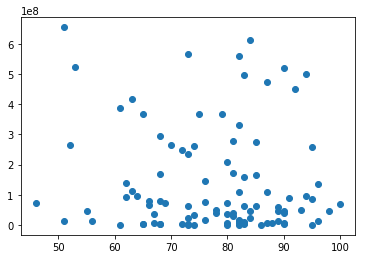

In [136]:
plt.scatter(x="Metascore", y="AdjustedForInflationBoxOffice", data=movies)

In [137]:
movies["AdjustedForInflationBoxOffice"].astype("int64").corr(movies["Metascore"])
# it actually looks like an inverse correlation, although a very week one.

-0.08968670571275925

### Lets look at the imdbRating and the Metascore

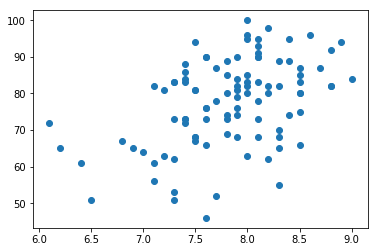

In [138]:
plt.scatter(x="imdbRating", y="Metascore", data=movies)
# This shows that critics and imdb users kinda of agree on ratings...

In [139]:
# critics and imdb users kinda of agree on ratings...
movies["imdbRating"].corr(movies["Metascore"])

0.4448863898133389

### Lets look at whether older movies have higher rating or not

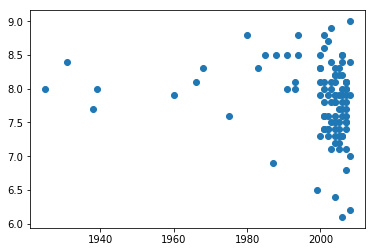

In [140]:
plt.scatter(x="Year", y="imdbRating", data=movies)
# This shows that some older movies had higher imdbRating

In [141]:
# we can see that the older the movie, the better the rating...
# not a very strong correlation, but it is there
movies["Year"].astype("int64").corr(movies["imdbRating"])

-0.18407486714339474

### What about critics? Do they appreicate older movies more?

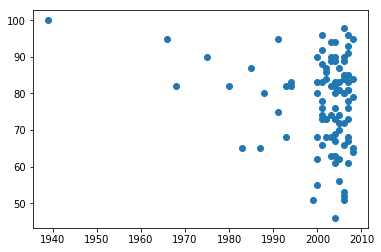

In [142]:
plt.scatter(x="Year", y="Metascore", data=movies)

In [143]:
# same thing, though a little bit stronger, for critics
movies["Year"].astype("int64").corr(movies["Metascore"])

-0.21948014777160466

### Finally, is there a correlationg between imdbVotes and Adjusted Gross?

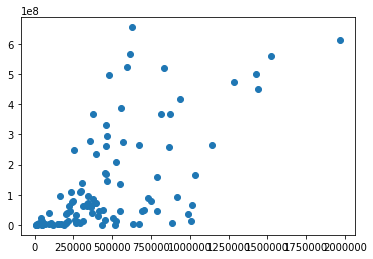

In [144]:
plt.scatter(x="imdbVotes", y="AdjustedForInflationBoxOffice", data=movies)
# looks like higher the Adjusted Gross, the higher the number of voters on IMDB.

In [145]:
movies["imdbVotes"].astype("int64").corr(movies["AdjustedForInflationBoxOffice"])
# Moderate strong correlation can be seen

0.6282144245985208

# Interesting Things I Found After Finishing the Assignment
* Metascore is the rating of critics while IMDB rating is for users on the website. 
* There is a correlation of 0.42, which is moderate, between Metascore and IMDB rating.
* The older the movie, the higher the rating, can be seen as there is a negative correlation between Metascore/imdbRating and Year. This is stronger for critics than IMDB users. Although, this is not a very strong conclusion in general, still can be seen.
* There is a correlation of 0.62, which is moderate/strong, between number of IMDB votes and Adjusted Gross.